# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [91]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

# 1. Cleaning and processing the data

In [92]:
# Your code to explore the data
# first look at the information about the data
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

In [93]:
# then identify null values
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

There's only one colum with nulls - `DepDel15`. The values in this column are booleans taking value *1* if `DepDelay` value is >= 15

In [94]:
# study the rows with nulls
df_flights[df_flights.isnull().any(axis=1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


Using `np.where` the values in `DepDel15` are set to 1 or 0 depending on the values in `DepDelay`. 

The same is done with `ArrDel15` to prevent possible errors.

In [95]:
import numpy as np

# DepDel15 is a boolean type column which has the value of 1 - True if the DepDelay value is over 15
# That's why we refill it based on the DepDelay time
df_flights['DepDel15'] = np.where(df_flights['DepDelay'] >= 15, 1, 0)
# Just to make sure we'll do the same with arrival delays
df_flights['ArrDel15'] = np.where(df_flights['ArrDelay'] >= 15, 1, 0)

In [96]:
# make sure there are no more nulls
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

We'll also create a date column to look at delays in dinamics

And route column to compare different routes.

In [97]:
df_flights['Date'] = pd.to_datetime(dict(year=df_flights['Year'], month=df_flights['Month'], day=df_flights['DayofMonth']))
df_flights['Route'] = df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName']
df_flights['StateRoute'] = df_flights['OriginState'] + ' > ' + df_flights['DestState']
df_flights['CityRoute'] = df_flights['OriginCity'] + ' > ' + df_flights['DestCity']

### Check the distribution and clean the outliers

In [98]:
%matplotlib inline
from scripts.plots import show_distribution

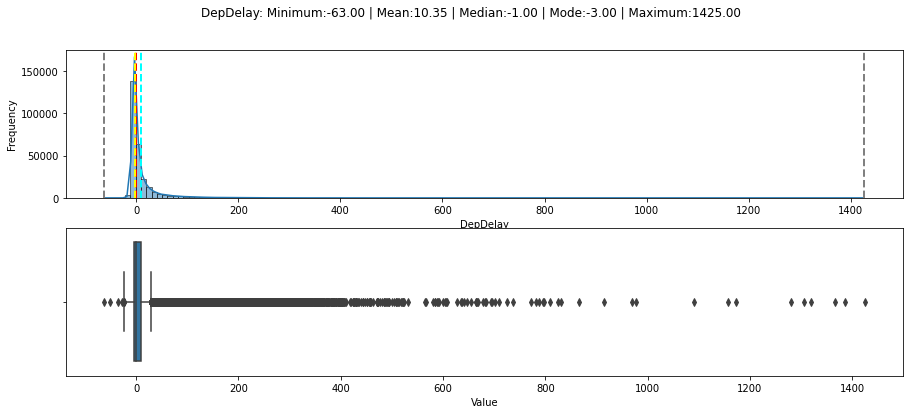

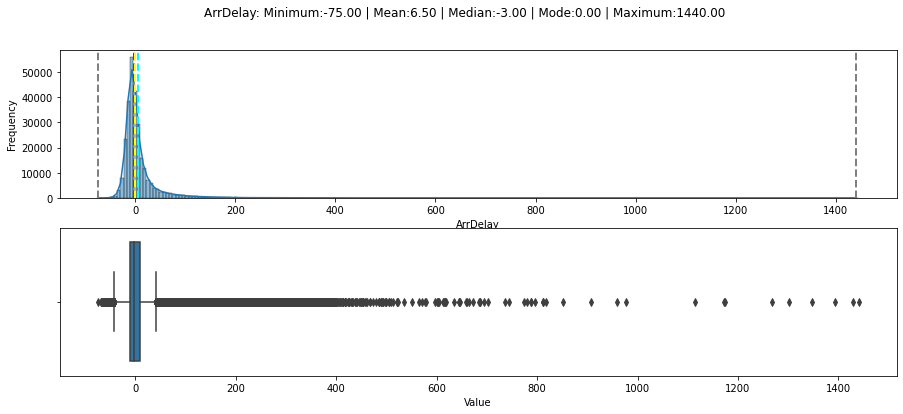

In [99]:
labels = ['DepDelay','ArrDelay']
for label in labels:
    show_distribution(df_flights[label])

In [100]:
arr_qup, arr_qlow = df_flights['ArrDelay'].quantile(0.97), df_flights['ArrDelay'].quantile(0.002)
df_flights = df_flights[(df_flights['ArrDelay'] > arr_qlow) & (df_flights['ArrDelay'] < arr_qup)]

dep_qup, dep_qlow = df_flights['DepDelay'].quantile(0.95), df_flights['DepDelay'].quantile(0.0001)
df_flights = df_flights[(df_flights['DepDelay'] > dep_qlow) & (df_flights['DepDelay'] < dep_qup)]

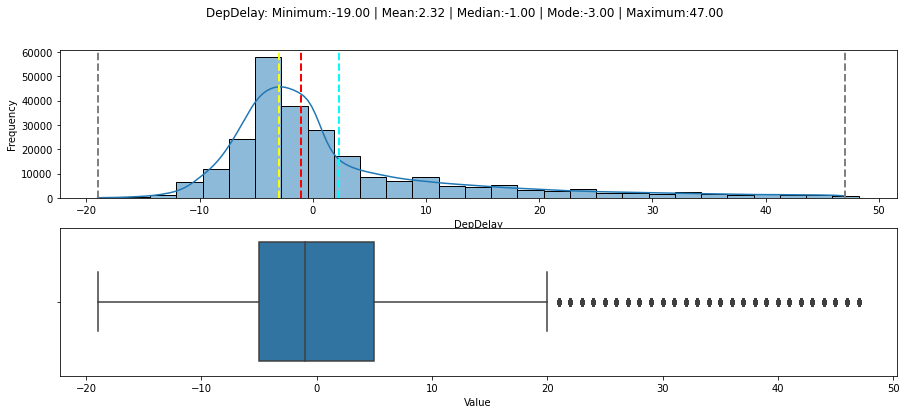

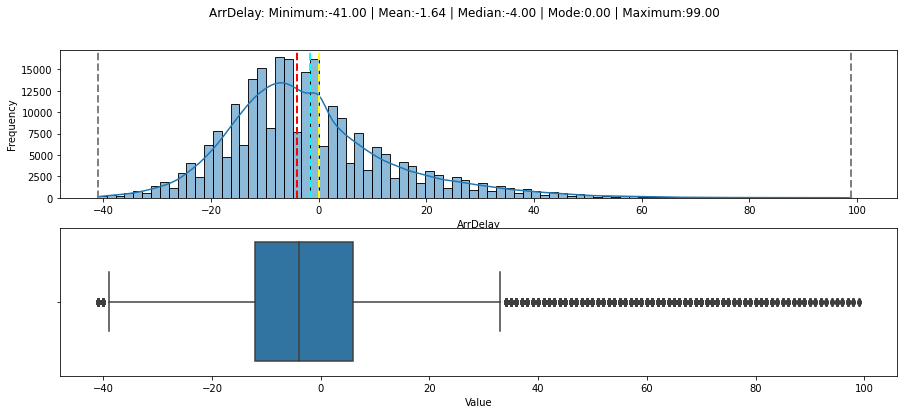

In [101]:
for label in labels:
    show_distribution(df_flights[label])

In [102]:
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Date,Route,StateRoute,CityRoute
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,4,0,1824,13,0,0,2013-09-16,Tampa International > John F. Kennedy Internat...,FL > NY,Tampa > New York
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,...,3,0,740,22,1,0,2013-09-23,Pittsburgh International > Chicago Midway Inte...,PA > IL,Pittsburgh > Chicago
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,-3,0,1614,-7,0,0,2013-09-07,Seattle/Tacoma International > Ronald Reagan W...,WA > DC,Seattle > Washington
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,...,35,1,1027,33,1,0,2013-07-22,Chicago O'Hare International > Cleveland-Hopki...,IL > OH,Chicago > Cleveland
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,-1,0,728,-9,0,0,2013-05-16,Norfolk International > Hartsfield-Jackson Atl...,VA > GA,Norfolk > Atlanta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271934,2013,4,13,6,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13204,...,-7,0,1705,-12,0,0,2013-04-13,Dallas/Fort Worth International > Orlando Inte...,TX > FL,Dallas/Fort Worth > Orlando
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,...,1,0,1945,18,1,0,2013-09-20,Orlando International > Los Angeles International,FL > CA,Orlando > Los Angeles
271936,2013,4,19,5,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,11697,...,24,1,1218,61,1,0,2013-04-19,Hartsfield-Jackson Atlanta International > For...,GA > FL,Atlanta > Fort Lauderdale
271937,2013,10,26,6,WN,12191,William P Hobby,Houston,TX,10821,...,30,1,1935,15,1,0,2013-10-26,William P Hobby > Baltimore/Washington Interna...,TX > MD,Houston > Baltimore


# 2. Study the data
### *View summary statistics for the numeric fields in the dataset.*

In [103]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,249837.0,249837.000000,249837.000000,249837.000000,249837.000000,249837.000000,249837.000000,249837.000000,249837.000000,249837.000000,249837.000000,249837.000000,249837.000000
mean,2013.0,7.005696,15.811101,3.903677,12750.529922,12738.278698,1306.548686,2.317047,0.131133,1488.196576,-1.643660,0.137830,0.011451
std,0.0,1.996317,8.831034,1.991753,1505.337181,1503.965315,469.918725,11.302102,0.337547,489.719042,16.217526,0.344722,0.106397
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-19.000000,0.000000,1.000000,-41.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,905.000000,-5.000000,0.000000,1110.000000,-12.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1300.000000,-1.000000,0.000000,1510.000000,-4.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1710.000000,5.000000,0.000000,1905.000000,6.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,47.000000,1.000000,2359.000000,99.000000,1.000000,1.000000


### *What are the average (mean) departure and arrival delays?*

In [104]:
# get the mean departure delay
mean_depdel = df_flights['DepDelay'].mean()

# get the mean arrival delay
mean_arrdel = df_flights['ArrDelay'].mean()

# print both
print('The average departure delay:\t{:.2f}\nThe average arrival delay:\t{:.2f}'.format(mean_depdel,mean_arrdel))

The average departure delay:	2.32
The average arrival delay:	-1.64


On average arrival delays were shorter than departure delays.

### *How do the carriers compare in terms of arrival delay performance?*

In [105]:
from scripts.plots import show_box

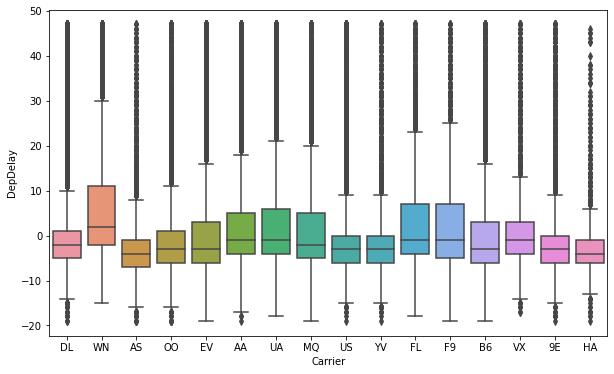

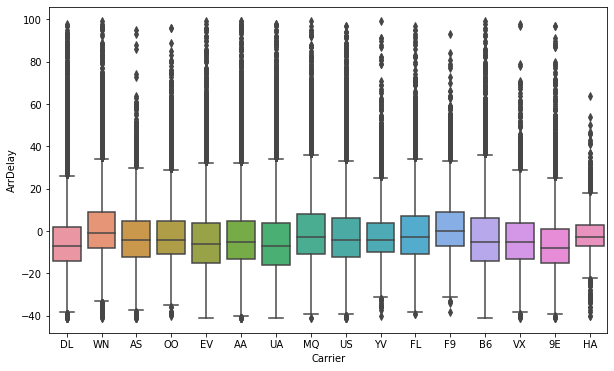

In [106]:
for label in labels:
    show_box(df_flights[[label, 'Carrier']])

### *Is there a noticable difference in arrival delays for different days of the week?*

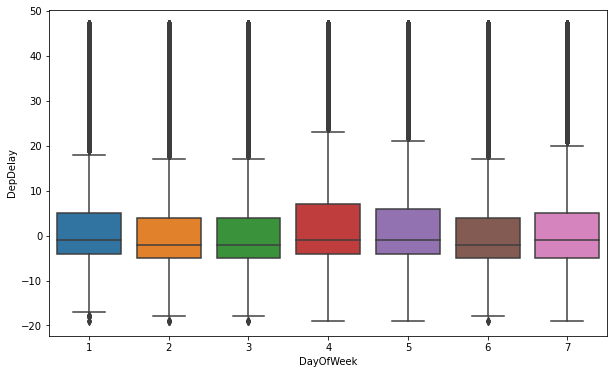

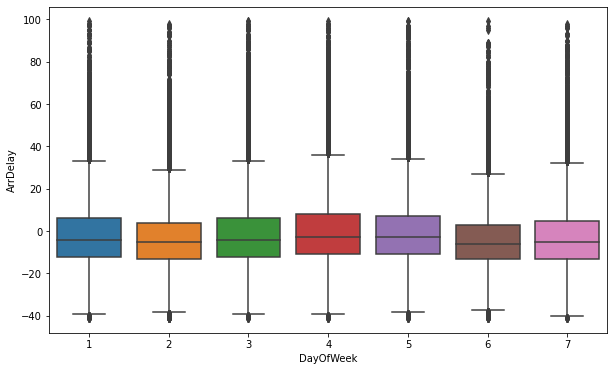

In [107]:
for label in labels:
    show_box(df_flights[[label, 'DayOfWeek']])

### *Which departure airport has the highest average departure delay?*

In [108]:
dep_delays = df_flights.groupby('OriginAirportName')['DepDelay'].mean().reset_index().sort_values('DepDelay', ascending=False)

dep_delays

,OriginAirportName,DepDelay
7,Chicago Midway International,7.997110
69,William P Hobby,6.400959
11,Dallas Love Field,5.988575
13,Denver International,5.201139
2,Baltimore/Washington International Thurgood Ma...,4.930408
...,...,...
20,Honolulu International,-0.916215
66,Tucson International,-1.153846
30,Long Beach Airport,-1.365915
25,Kahului Airport,-1.791892


<AxesSubplot: xlabel='OriginAirportName', ylabel='DepDelay'>

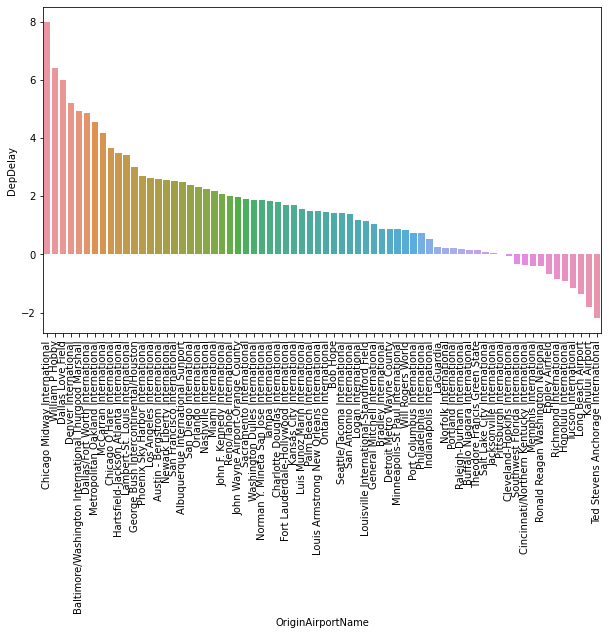

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
sns.barplot(dep_delays, x='OriginAirportName', y='DepDelay')


### *Do **late** departures tend to result in longer arrival delays than on-time departures?*

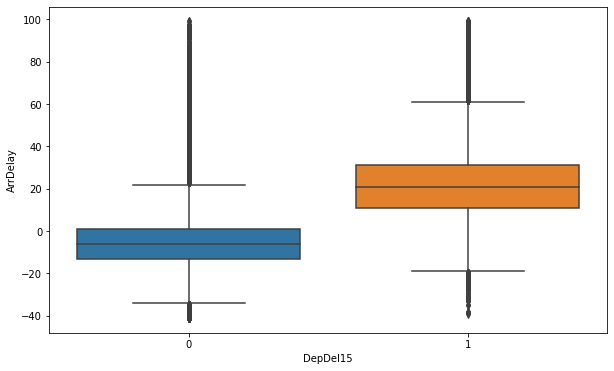

In [110]:
show_box(df_flights[['ArrDelay', 'DepDel15']])

### *Which route (from origin airport to destination airport) has the most **late** arrivals?*

In [111]:
df_flights.groupby('Route')['ArrDel15'].sum().reset_index().sort_values('ArrDel15', ascending=False)

,Route,ArrDel15
1201,Los Angeles International > San Francisco Inte...,142
2185,San Francisco International > Los Angeles Inte...,123
1023,LaGuardia > Hartsfield-Jackson Atlanta Interna...,112
1180,Los Angeles International > McCarran Internati...,106
1312,McCarran International > Los Angeles Internati...,103
...,...,...
1848,Pittsburgh International > San Francisco Inter...,0
1843,Pittsburgh International > Nashville Internati...,0
1828,Pittsburgh International > Cleveland-Hopkins I...,0
2338,Ted Stevens Anchorage International > Salt Lak...,0


### *Which route has the highest average arrival delay?*

In [112]:
df_flights.groupby('Route')['ArrDelay'].mean().reset_index().sort_values('ArrDelay', ascending=False)

,Route,ArrDelay
2283,Southwest Florida International > Theodore Fra...,44.000000
399,Cleveland-Hopkins International > Philadelphia...,26.272727
1238,Louis Armstrong New Orleans International > Ro...,25.333333
1391,Metropolitan Oakland International > Logan Int...,21.166667
928,John F. Kennedy International > Richmond Inter...,19.500000
...,...,...
413,Cleveland-Hopkins International > Will Rogers ...,-21.875000
609,Eppley Airfield > LaGuardia,-22.200000
865,Jacksonville International > Chicago Midway In...,-22.727273
508,Denver International > Kahului Airport,-25.500000
